# Analisis de visitas - modelos de gestión

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def cargarMenu():
        opcion = int(input("""Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir\n """))
        
        if opcion != 0:
            mes = input("Ingrese el mes a analizar")
            regla = input("Ingrese la regla de negocio")
            return opcion,mes, regla
        
        return opcion,"",""

def subMenu():
    print("Seleccione la opcion a analizar")
    return input("""1.- Obtener las rutas/clientes que se visitaron menos que la regla de negocio
2.- Obtener las rutas que se visitaron MAS O IGUAL que la regla de negocio
3.- Obtener los MM que cumplen con la regla de negocio\n""")


In [2]:
def cargarArchivo(opcion, mes):
        return pd.read_csv("C:\\Users\\juayala\\Documents\\CursoPython\\schedules" + str(opcion) + mes + ".csv")

In [3]:

def analizar(tipo, data, regla):
    
#agrupados = datos.groupby(['customer'],as_index=False).idSchedul.count().sort_values(by='idSchedul',ascending=False).head(10)
        
    #Menos visitas
    if int(tipo) == (1 or 3):
        data = data[data["idSchedul"] < int(regla) ]
        
    #Mayor o igual a las visitas
    elif int(tipo) == (2 or 4):
        data = data[data["idSchedul"] >= int(regla) ]
        
    if data.shape[0] > 0:  #si el dataframe tiene rows 
        #Crear la grafica
        print("Aqui va la grafica")
        print(data.head())
        #data.set_index('routeSchedule',inplace=True)
        data["idSchedul"].plot(kind='bar')
        #plt.plot(data["idSchedul"])
    else:
        print("No se encontraron datos")
        

Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 35
Ingrese el mes a analizarAgosto
Ingrese la regla de negocio10
Seleccione la opcion a analizar
1.- Obtener las rutas/clientes que se visitaron menos que la regla de negocio
2.- Obtener las rutas que se visitaron MAS O IGUAL que la regla de negocio
3.- Obtener los MM que cumplen con la regla de negocio
2
          idSchedul  employee
customer                     
310904           12        12
315898           12        12
313340           11        11
315877           10        10
459793           10        10
Aqui va la grafica
          idSchedul  employee
customer                     
310904           12        12
315898           12        12
313340           11        11
315877           10        10
459793           10        10
Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 0


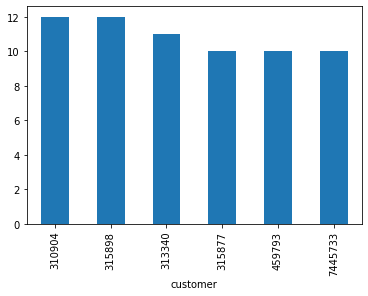

In [5]:
Salir=""

while(Salir!=0):

    optionSelected,mesSelected,regla = cargarMenu()
    
    if optionSelected == 0:
        Salir=0
        break
    
    datos = cargarArchivo(optionSelected, mesSelected)
    tipoAnalisis=0
    
    if optionSelected == 4:
        filtrado = datos[["idSchedul",'routeSchedule','employee']]
        #Analisis de visita por ruta
        tipoAnalisis = subMenu()
        if tipoAnalisis !=3:
            
            agrupados = filtrado.groupby(['routeSchedule'],as_index=True).count().sort_values(by='idSchedul',ascending=False)
        else:
            agrupados = filtrado.groupby(['employee'],as_index=True).count().sort_values(by='idSchedul',ascending=False)
        
        analizar(tipoAnalisis, agrupados, regla)


    elif optionSelected == 35:
        filtrado = datos[["idSchedul",'customer','employee']]
        #Analisis de visita por cliente
        tipoAnalisis = subMenu()

        if tipoAnalisis !=3:
            agrupados = filtrado.groupby(['customer'],as_index=True).count().sort_values(by='idSchedul',ascending=False)
            print(agrupados.head())
        else:
            agrupados = filtrado.groupby(['employee'],as_index=True).count().sort_values(by='idSchedul',ascending=False)
        
        analizar(int(tipoAnalisis), agrupados, regla)
      
    else:
        print("Opcion incorrecta, por favor verifique!")